LEVEL - 3 :
Task-1 : Predictive Modeling
***. Build a regression model to predict the
aggregate rating of a restaurant based on
available features.

***. Split the dataset into training and testing sets
and evaluate the model's performance using
appropriate metrics.

***. Experiment with different algorithms (e.g.,
linear regression, decision trees, random
forest) and compare their performance.

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

file_path = 'Dataset .csv'
df = pd.read_csv(file_path)

features = ['Latitude', 'Longitude', 'Price range', 'Has Table booking', 'Has Online delivery']
target = 'Aggregate rating'

df['Has Table booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})

X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression - Mean Squared Error: {mse}, R-squared: {r2}")

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

print(f"Decision Tree - Mean Squared Error: {dt_mse}, R-squared: {dt_r2}")

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest - Mean Squared Error: {rf_mse}, R-squared: {rf_r2}")


Linear Regression - Mean Squared Error: 1.720228299755262, R-squared: 0.2397734923774817
Decision Tree - Mean Squared Error: 2.1692339974473343, R-squared: 0.0413428343609733
Random Forest - Mean Squared Error: 1.415665585924206, R-squared: 0.3743699574634015


LEVEL - 3 :
Task - 2 : Task: Customer Preference Analysis.

***. Analyze the relationship between the type of
cuisine and the restaurant's rating.

***. Identify the most popular cuisines among
customers based on the number of votes.

***. Determine if there are any specific cuisines
that tend to receive higher ratings.

In [22]:
import pandas as pd
file_path = 'Dataset .csv'
df = pd.read_csv(file_path)

cuisine_rating = df.groupby('Cuisines')['Aggregate rating'].mean()
print("Average rating by cuisine type:")
print(cuisine_rating)

popular_cuisines = df.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False).head(10)
print("Top 10 popular cuisines based on number of votes:")
print(popular_cuisines)

high_rating_cuisines = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
print("Top 10 cuisines with highest average ratings:")
print(high_rating_cuisines)


Average rating by cuisine type:
Cuisines
Afghani                                      0.725
Afghani, Mughlai, Chinese                    0.000
Afghani, North Indian                        0.000
Afghani, North Indian, Pakistani, Arabian    0.000
African                                      4.700
                                             ...  
Western, Asian, Cafe                         4.200
Western, Fusion, Fast Food                   3.200
World Cuisine                                4.900
World Cuisine, Mexican, Italian              4.400
World Cuisine, Patisserie, Cafe              4.200
Name: Aggregate rating, Length: 1825, dtype: float64
Top 10 popular cuisines based on number of votes:
Cuisines
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South 

LEVEL - 3 :
Task - 3 : Task: Data Visualization

***. Create visualizations to represent the distribution
of ratings using different charts (histogram, bar
plot, etc.).

***. Compare the average ratings of different cuisines
or cities using appropriate visualizations.

***. Visualize the relationship between various
features and the target variable to gain insights.

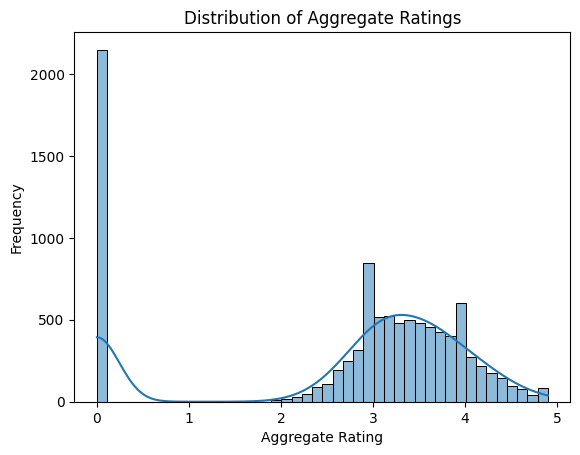

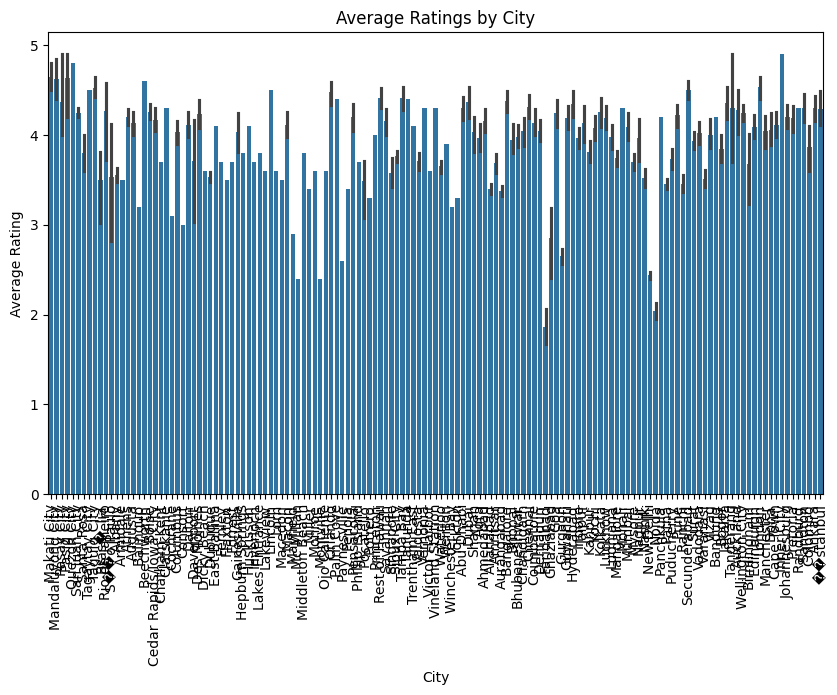

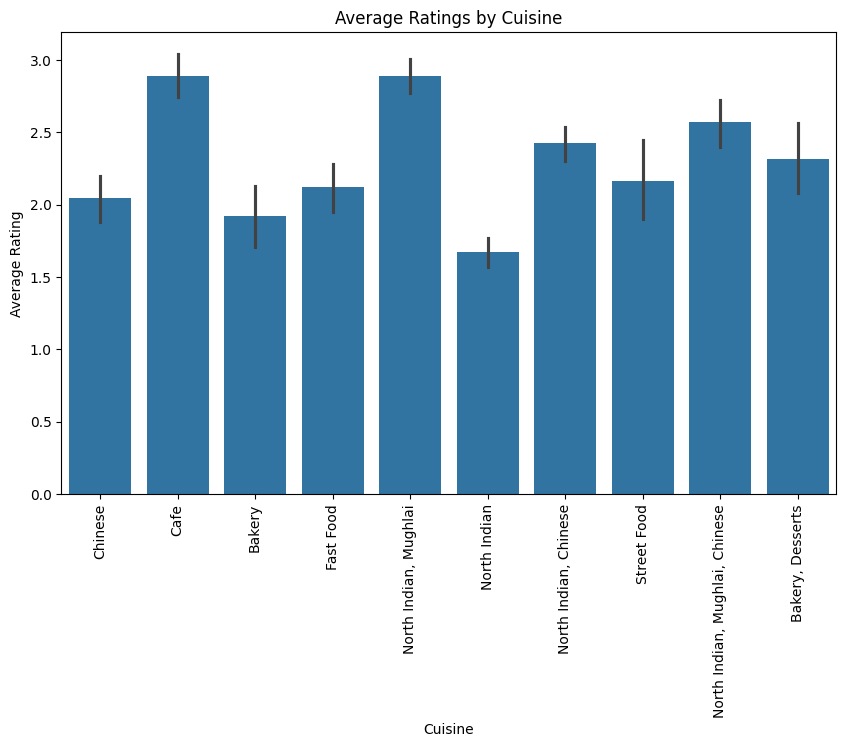

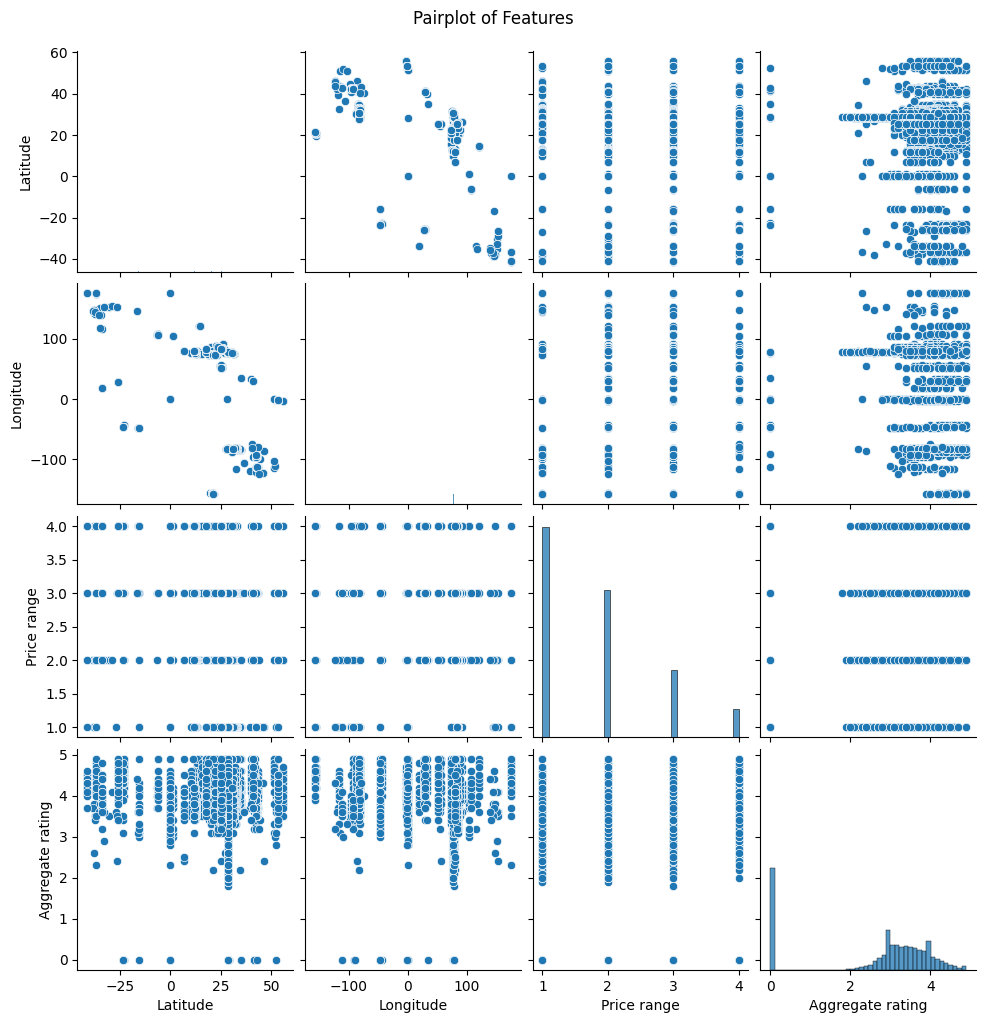

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Aggregate rating'], kde=True)
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Aggregate rating', data=df)
plt.title('Average Ratings by City')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6))
top_cuisines = df['Cuisines'].value_counts().index[:10]  # Top 10 cuisines
sns.barplot(x='Cuisines', y='Aggregate rating', data=df[df['Cuisines'].isin(top_cuisines)])
plt.title('Average Ratings by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

sns.pairplot(df[['Latitude', 'Longitude', 'Price range', 'Aggregate rating']])
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()
